In [1]:
#import sys
#sys.path.append(r'c:\users\usuario\appdata\local\programs\python\python310\lib\site-packages')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from numba import njit

In [3]:
# Usar el decorador @njit permite usar numba para omptimizar grandemente el tiempo que tarda en hacer los 
# for loops los cuales atraviesan cada una de las lineas del archivo (pasa de tardar 2-5minutos a menos de 5sg)

@njit
def compute_pulse_widths(time_array, vout_array, threshold, time_divisor = 3.125e-9):
    pulse_widths = []
    pulse_start_time = None

    for i in range(1, len(vout_array)):
        if vout_array[i] > threshold and (pulse_start_time is None or vout_array[i-1] <= threshold):
            # Rising edge detected
            pulse_start_time = time_array[i]
        elif vout_array[i] <= threshold and pulse_start_time is not None and vout_array[i-1] > threshold:
            # Falling edge detected
            pulse_end_time = time_array[i]
            # Calculate pulse width
            width = (pulse_end_time - pulse_start_time) / time_divisor
            pulse_widths.append(np.floor(width))  # Floor to nearest lower integer
            pulse_start_time = None

    return pulse_widths


# Analisis de archivos sampleando de la curva caracteristica con poissioniana

## 2000 muones - Sept - Test 1

                 time  V(input_bode)        V(out)     V(out_fs)  \
0        0.000000e+00       0.000000  2.000000e-08  0.000000e+00   
1        7.002334e-10       0.000000  2.000000e-08  0.000000e+00   
2        7.152384e-10       0.000026  2.000000e-08  1.226248e-08   
3        7.352451e-10       0.000061  2.000000e-08  8.738240e-08   
4        7.542514e-10       0.000094  2.000000e-08  2.645544e-07   
...               ...            ...           ...           ...   
3074322  1.999998e-03       0.000017  2.000000e-08 -1.274791e-03   
3074323  1.999999e-03       0.000016  2.000000e-08 -1.219545e-03   
3074324  2.000000e-03       0.000015  2.000000e-08 -1.166714e-03   
3074325  2.000000e-03       0.000015  2.000000e-08 -1.165521e-03   
3074326  2.000000e-03       0.000015  2.000000e-08 -1.165197e-03   

         V(out_preamp)  
0             0.000000  
1             0.000000  
2            -0.000001  
3            -0.000006  
4            -0.000012  
...                ...  
3074322 

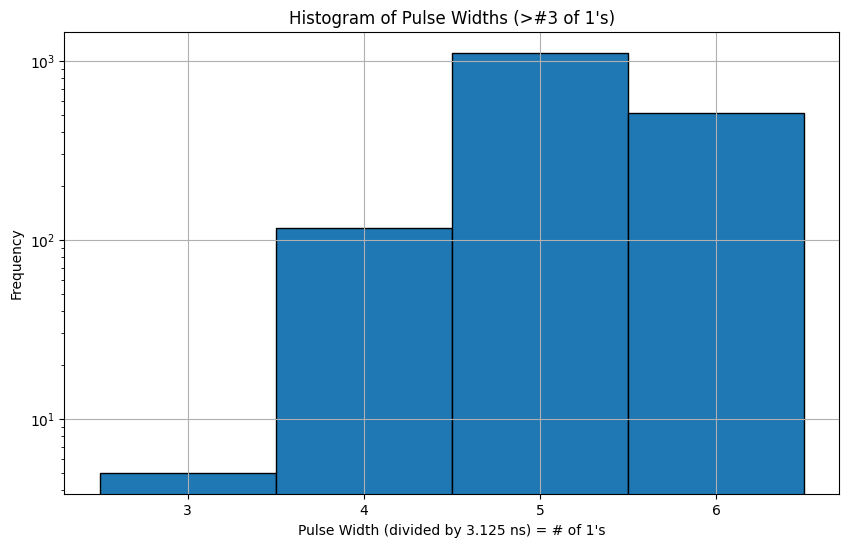

In [5]:
# Load data
df_muones_2000_update = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Labo - Archivos Grandes para GitHub\LTSpice\Sept\1000_mu_corcuito_update.txt", sep="\t")
print(df_muones_2000_update)

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_2000_update['time'].values
vout_array = df_muones_2000_update['V(out)'].values

# Define threshold and time divisor
threshold = 0.1  # 200mV threshold

# Call the numba-optimized function
pulse_widths_2000_update = compute_pulse_widths(time_array, vout_array, threshold)

# Convert to DataFrame
pulse_widths_df_muones_2000_update = pd.DataFrame(pulse_widths_2000_update, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_2000_update)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()

### 10.000 muones - Sept - New Update

                  time  V(input_bode)        V(out)     V(out_fs)  \
0         0.000000e+00       0.000000  2.000000e-08  0.000000e+00   
1         4.551517e-10       0.000002  2.000000e-08  2.328801e-10   
2         5.001667e-10       0.000023  2.000000e-08  5.250519e-08   
3         5.121707e-10       0.000045  2.000000e-08  1.241909e-07   
4         5.281761e-10       0.000074  2.000000e-08  3.247707e-07   
...                ...            ...           ...           ...   
16384541  1.194212e-02       0.000006  2.000000e-08  1.514304e-12   
16384542  1.195886e-02       0.000006  2.000000e-08 -1.399414e-11   
16384543  1.197560e-02       0.000006  2.000000e-08 -3.728928e-11   
16384544  1.199903e-02       0.000006  2.000000e-08  1.064362e-07   
16384545  1.200000e-02       0.000006  2.000000e-08  1.160297e-07   

          V(out_preamp)  
0          0.000000e+00  
1         -7.105712e-08  
2         -2.677106e-06  
3         -4.858965e-06  
4         -9.607079e-06  
...            

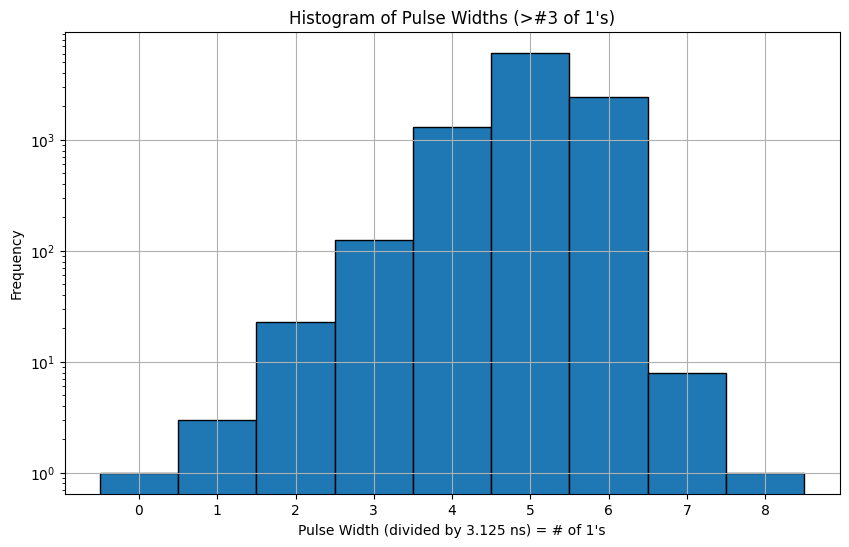

In [6]:
# Load data
df_muones_10000_update = pd.read_csv(r"C:\Users\smili\OneDrive\Documents\GitHub\Labo - Archivos Grandes para GitHub\LTSpice\Sept\10000_mu_circuito_update.txt", sep="\t")
print(df_muones_10000_update)

# Convert relevant columns to numpy arrays for fast processing
time_array = df_muones_10000_update['time'].values
vout_array = df_muones_10000_update['V(out)'].values

# Define threshold and time divisor
threshold = 0.1  # 200mV threshold

# Call the numba-optimized function
pulse_widths_10000_update = compute_pulse_widths(time_array, vout_array, threshold)

# Convert to DataFrame
pulse_widths_df_muones_10000_update = pd.DataFrame(pulse_widths_10000_update, columns=['Pulse Width (divided by 3.125 ns)'])

# Display result
print(pulse_widths_df_muones_10000_update)


# Filter data to keep only values greater than 3
#filtered_pulse_widths_df_muones_2000_update = pulse_widths_df_muones_2000_update[pulse_widths_df_muones_2000_update['Pulse Width (divided by 3.125 ns)']]

# Plot histogram with bins aligned to integers
plt.figure(figsize=(10, 6))
bin_edges = np.arange(np.min(pulse_widths_df_muones_10000_update['Pulse Width (divided by 3.125 ns)']),
                      np.max(pulse_widths_df_muones_10000_update['Pulse Width (divided by 3.125 ns)']) + 2) - 0.5
plt.hist(pulse_widths_df_muones_10000_update['Pulse Width (divided by 3.125 ns)'], bins=bin_edges, edgecolor='black')
plt.title('Histogram of Pulse Widths (>#3 of 1\'s)')
plt.xlabel('Pulse Width (divided by 3.125 ns) = # of 1\'s')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(np.min(pulse_widths_df_muones_10000_update['Pulse Width (divided by 3.125 ns)']),
                     np.max(pulse_widths_df_muones_10000_update['Pulse Width (divided by 3.125 ns)']) + 1))
plt.yscale('log')
plt.show()